In [124]:
import pandas as pd

#Reading the csv file

data = pd.read_csv('/Users/amruguru/Downloads/diabetes.csv')

#Converting into dataframe

df = pd.DataFrame(data)

#Description of data in fataframe

print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [125]:
#Showing the mode of every column

print(df.mode())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0       99           70.0            0.0      0.0  32.0   
1          NaN      100            NaN            NaN      NaN   NaN   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.254  22.0      0.0  
1                     0.258   NaN      NaN  


In [126]:
#Summary of the class variable 'Outcome' (If patient has diabetes or not)

df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [127]:
#Data types of each column

print("Data Types \n")
print(df.dtypes)

#Printing first few rows of dataframe

print("\n First few rows \n")
print(df.head)

#Printing last few rows of dataframe

print("\n Last few rows \n")
print(df.tail)

Data Types 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

 First few rows 

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764     

In [130]:
#Summary of dataframe (Column name, data types, no. of entries etc)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [131]:
#Printing number of rows in dataframe

len(df)

768

In [ ]:
#Checking the data for null/missing values

df.isnull()

In [148]:
#Cleaning data if there are null/missing values (there are no null/missing values so no rows are removed)

data_clean = df.dropna()
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [132]:
#Removing duplicate values in dataframe

#Making copy of dataframe in case deletion takes place

df1 = df.copy()

#Loop to run through each row looking for duplicate values

for i in range(df.shape[1] - 1):
    temp = df.iloc[:, i].value_counts()
    if len(temp) == 1:
        df1 = df1.drop(df.columns[i], axis=1)

#Printing new dataframe

print(df1)

#Printing number of rows to check if rows were deleted (Not deleted accoridng to result)

len(df1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

768

In [133]:
#Checking dataframe for zero variability

def nearZeroVar(df1):
    near_zero_cols = []
    for col in df1.columns:
        if df1[col].nunique() == 1:
            near_zero_cols.append(col)
    return near_zero_cols

#Finding the columns with zero variability

cols = nearZeroVar(df1)

#Dropping columns with zero variability from df1

df1 = df1.drop(cols, axis=1)

#Printing the dataframe after removal 

print(df1)

#Printing number of rows to check if rows were deleted (Not deleted accoridng to result)

len(df1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

768

In [134]:
#Using df henceforth as both df & df1 dataframes are same so far due to zero removal of columns

#Creating loop to find quartiles and IQR for each column

for i in range(df.shape[1]):
    
    #Calculating quartiles and IQR
    
    q1 = df.iloc[:, i].quantile(0.25)
    q3 = df.iloc[:, i].quantile(0.75)
    IQR = q3 - q1
    
    #Printing quartiles and IQR for each column
    
    print("df column", i, "q1:", q1, "q3:", q3, "IQR:", IQR)
    
    #Removing columns if 1. q1 = q3 (all values could be identical) 2. IQR = 0 
    
    if (q1 == 0 and q3 == 0) or (IQR == 0) or df.iloc[:, i].isnull().any():
        df = df.drop(df.columns[i], axis=1)

len(df) #Result shows no columns removed from above 2 conditions

df column 0 q1: 1.0 q3: 6.0 IQR: 5.0
df column 1 q1: 99.0 q3: 140.25 IQR: 41.25
df column 2 q1: 62.0 q3: 80.0 IQR: 18.0
df column 3 q1: 0.0 q3: 32.0 IQR: 32.0
df column 4 q1: 0.0 q3: 127.25 IQR: 127.25
df column 5 q1: 27.3 q3: 36.6 IQR: 9.3
df column 6 q1: 0.24375 q3: 0.62625 IQR: 0.38249999999999995
df column 7 q1: 24.0 q3: 41.0 IQR: 17.0
df column 8 q1: 0.0 q3: 1.0 IQR: 1.0


768

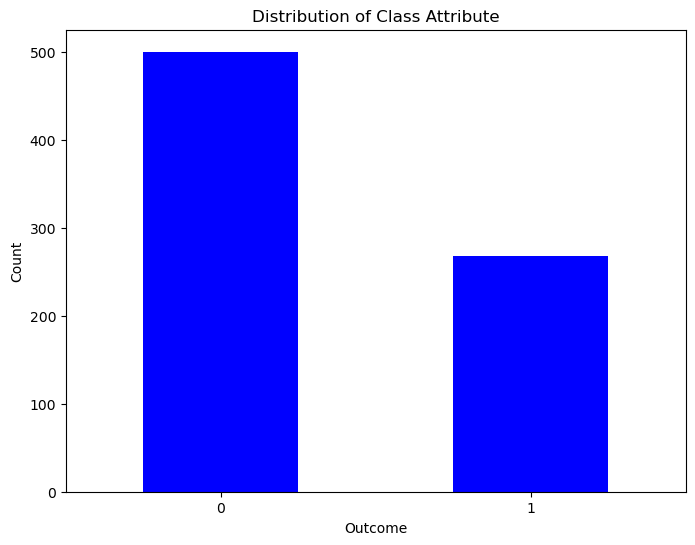

In [135]:
#Barplot of class attribute 'Outcome'

import matplotlib.pyplot as plt

class_attribute_counts = df['Outcome'].value_counts()

#Creating barplot

plt.figure(figsize=(8, 6))
class_attribute_counts.plot(kind='bar', color='blue')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Class Attribute')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability (optional)
plt.show()


In [136]:
#Test Train split

from sklearn.model_selection import train_test_split

#Splitting the data into features (X) and class variable (y)
X = df.drop('Outcome', axis=1)
y = data['Outcome']

#Splitting the data into train and test sets of 50/50 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


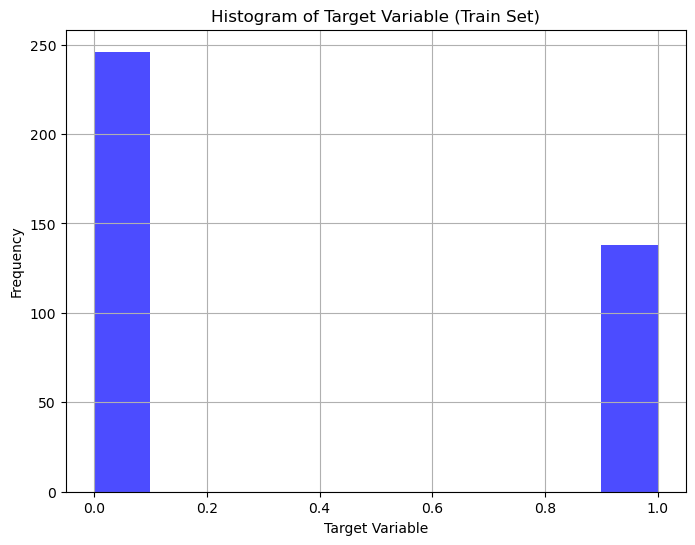

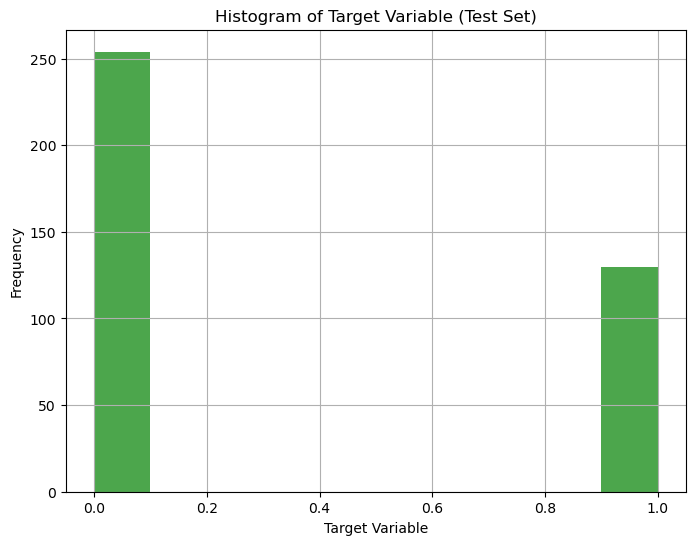

In [137]:
#Histogram for test and train datasets

import matplotlib.pyplot as plt

#Plotting histogram for train set
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Target Variable (Train Set)')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Plotting histogram for test set
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=10, color='green', alpha=0.7)
plt.title('Histogram of Target Variable (Test Set)')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [138]:
#Balancing the dataset

from imblearn.under_sampling import RandomUnderSampler

#Creating a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=42)

#Applying under-sampling to the training set
X_bal_train, y_bal_train = rus.fit_resample(X_train, y_train)

#Applying under-sampling to the testing set
X_bal_test, y_bal_test = rus.fit_resample(X_test, y_test)


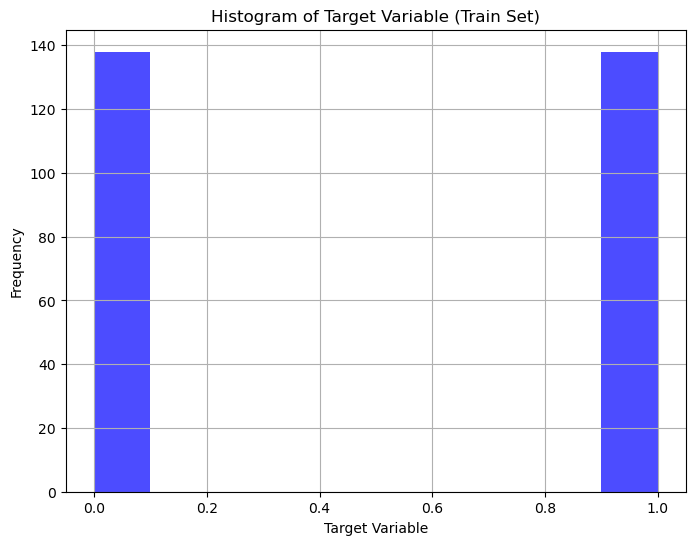

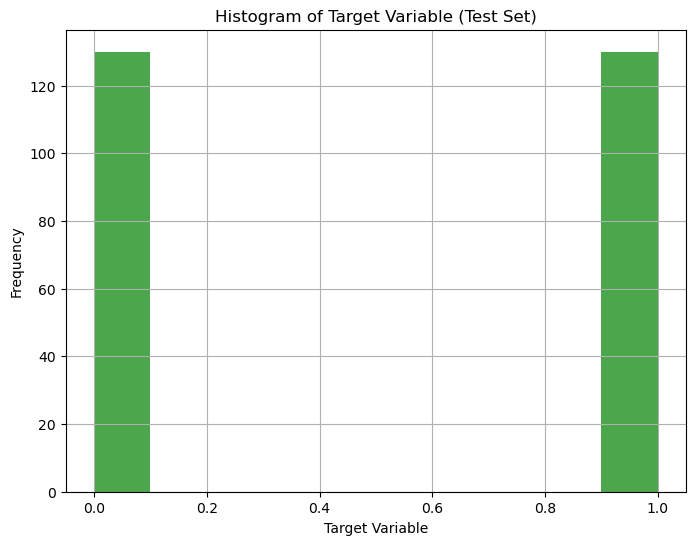

In [139]:
#Histogram for balanced test & train datasets

import matplotlib.pyplot as plt

# Plotting histogram for balanced train set
plt.figure(figsize=(8, 6))
plt.hist(y_bal_train, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Target Variable (Train Set)')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting histogram for balanced test set
plt.figure(figsize=(8, 6))
plt.hist(y_bal_test, bins=10, color='green', alpha=0.7)
plt.title('Histogram of Target Variable (Test Set)')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [140]:
#Using Information Gain Feature Selection method

from sklearn.feature_selection import mutual_info_classif

#Calculating information gain for features in the balanced training set
info_gain_scores = mutual_info_classif(X_bal_train, y_bal_train)

#Creating a dictionary to store feature names and their information gain scores
feature_scores = dict(zip(X_bal_train.columns, info_gain_scores))   

#Sorting the features by their information gain scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Printing all feature scores
print("All Feature Scores:")
for feature, score in sorted_features:
    print(f"Feature: {feature}, Information Gain Score: {score}")

#Printing the top 3 features and their information gain scores (which would be used for the classifiers)
print("\nTop 3 Features:")
for feature in sorted_features[:3]:
    print(f"Feature: {feature[0]}, Information Gain Score: {feature[1]}")


All Feature Scores:
Feature: Glucose, Information Gain Score: 0.14271301328785135
Feature: Age, Information Gain Score: 0.09720432887959385
Feature: BMI, Information Gain Score: 0.06705109793004937
Feature: Insulin, Information Gain Score: 0.031812352806218414
Feature: Pregnancies, Information Gain Score: 0.019873933255126985
Feature: DiabetesPedigreeFunction, Information Gain Score: 0.014629426282228852
Feature: BloodPressure, Information Gain Score: 0.0
Feature: SkinThickness, Information Gain Score: 0.0

Top 3 Features:
Feature: Glucose, Information Gain Score: 0.14271301328785135
Feature: Age, Information Gain Score: 0.09720432887959385
Feature: BMI, Information Gain Score: 0.06705109793004937


In [141]:
#Using Fisher Score Feature Selection method

from sklearn.feature_selection import f_classif

#Calculating the Fisher scores for features in the balanced training set
fisher_scores, _ = f_classif(X_bal_train, y_bal_train)

#Creating a dictionary to store feature names and their Fisher scores
feature_scores = dict(zip(X_bal_train.columns, fisher_scores))

#Sorting the features by their Fisher scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Printing all feature scores
print("All Feature Scores:")
for feature, score in sorted_features:
    print(f"Feature: {feature}, Fisher Score: {score}")

#Printing the top 3 features and their Fisher scores (which would be used for the classifiers)
print("\nTop 3 Features:")
for feature in sorted_features[:3]:
    print(f"Feature: {feature[0]}, Fisher Score: {feature[1]}")


All Feature Scores:
Feature: Glucose, Fisher Score: 75.75747403968552
Feature: BMI, Fisher Score: 31.82655548825894
Feature: Age, Fisher Score: 25.207034387565116
Feature: Pregnancies, Fisher Score: 19.9664067669075
Feature: DiabetesPedigreeFunction, Fisher Score: 10.09623895033781
Feature: Insulin, Fisher Score: 4.247739418971201
Feature: BloodPressure, Fisher Score: 3.9324981966437664
Feature: SkinThickness, Fisher Score: 1.0640931612824869

Top 3 Features:
Feature: Glucose, Fisher Score: 75.75747403968552
Feature: BMI, Fisher Score: 31.82655548825894
Feature: Age, Fisher Score: 25.207034387565116


Accuracy: 0.7423076923076923
Confusion Matrix:
[[99 31]
 [36 94]]


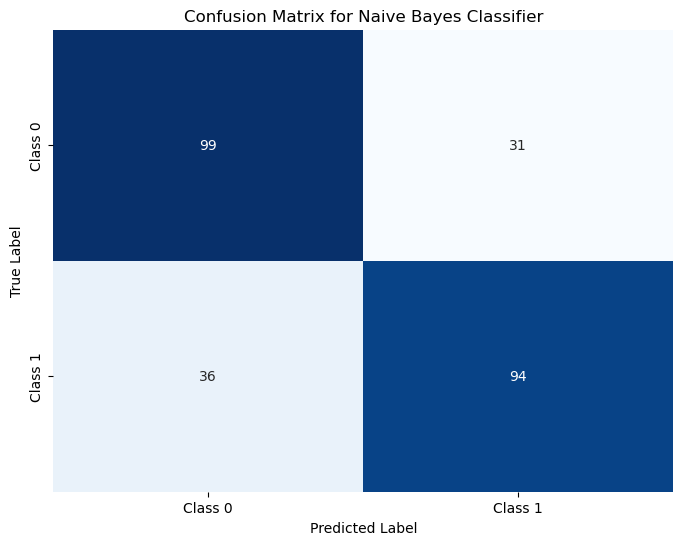

In [142]:
#Applying Naive Bayesian classifier with Information Gain results

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Extracting the top 3 features from the balanced training and testing datasets
X_bal_train_nb = X_bal_train[['Glucose', 'Age', 'BMI']]
X_bal_test_nb = X_bal_test[['Glucose', 'Age', 'BMI']]

#Initializing and training the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_bal_train_nb, y_bal_train)

#Predict the labels for the testing dataset
y_pred_nb = nb_classifier.predict(X_bal_test_nb)

#Calculating accuracy
accuracy_nb = accuracy_score(y_bal_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

#Computing the confusion matrix
conf_matrix_nb = confusion_matrix(y_bal_test, y_pred_nb)

#Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_nb)

#Plotting the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


Accuracy: 0.7307692307692307
Confusion Matrix:
[[96 34]
 [36 94]]


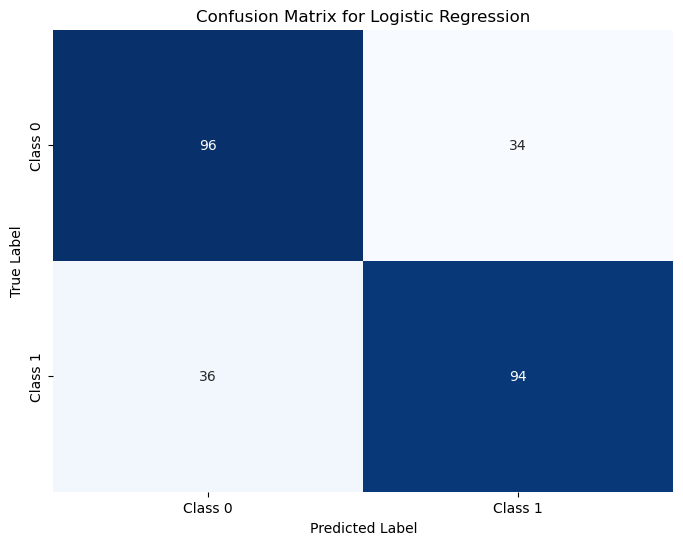

In [149]:
#Applying Logistic Regression classifier with Information Gain results

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Extracting the top 3 features from the balanced training and testing datasets
X_bal_train_lr = X_bal_train[['Glucose', 'Age', 'BMI']]
X_bal_test_lr = X_bal_test[['Glucose', 'Age', 'BMI']]

#Initializing and training the logistic regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_bal_train_lr, y_bal_train)

#Predicting the labels for the testing dataset
y_pred_lr = lr_classifier.predict(X_bal_test_lr)

#Calculating accuracy
accuracy_lr = accuracy_score(y_bal_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

#Computing the confusion matrix
conf_matrix_lr = confusion_matrix(y_bal_test, y_pred_lr)

#Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_lr)

# Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Accuracy: 0.7576923076923077
[[ 94  36]
 [ 27 103]]


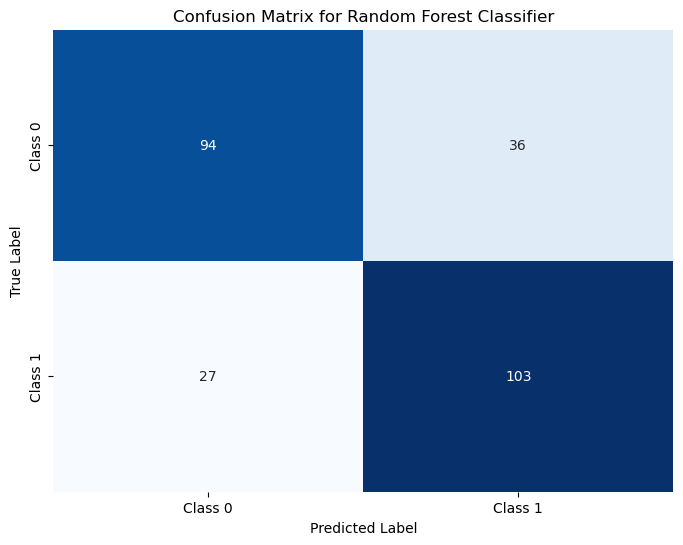

In [150]:
#Applying Random Forest classifier with Information Gain results

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Extracting the top 3 features from the balanced training and testing datasets
X_bal_train_rf = X_bal_train[['Glucose', 'Age', 'BMI']]
X_bal_test_rf = X_bal_test[['Glucose', 'Age', 'BMI']]

#Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_bal_train_rf, y_bal_train)

#Predicting the labels for the testing dataset
y_pred_rf = rf_classifier.predict(X_bal_test_rf)

#Calculating accuracy
accuracy_rf = accuracy_score(y_bal_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

#Computing the confusion matrix
conf_matrix_rf = confusion_matrix(y_bal_test, y_pred_rf)
print(conf_matrix_rf)

#Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Accuracy: 0.6423076923076924
[[81 49]
 [44 86]]


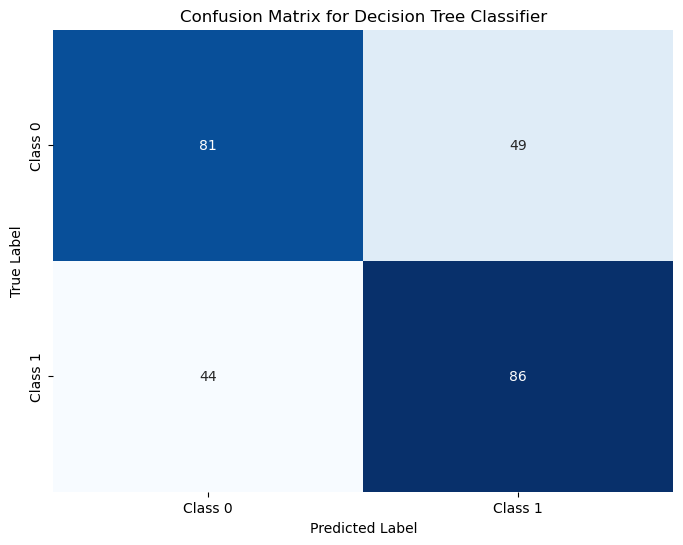

In [153]:
#Applying Decision Tree classifier with Information Gain results

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Extracting the top 3 features from the balanced training and testing datasets
X_bal_train_dt = X_bal_train[['Glucose', 'Age', 'BMI']]
X_bal_test_dt = X_bal_test[['Glucose', 'Age', 'BMI']]

#Initializing and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_bal_train_dt, y_bal_train)

#Predicting the labels for the testing dataset
y_pred_dt = dt_classifier.predict(X_bal_test_dt)

#Calculating accuracy
accuracy_dt = accuracy_score(y_bal_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

#Computing the confusion matrix
conf_matrix_dt = confusion_matrix(y_bal_test, y_pred_dt)
print(conf_matrix_dt)

#Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


Accuracy of SVM classifier: 0.7230769230769231
Confusion matrix of SVM classifier:
 [[94 36]
 [36 94]]


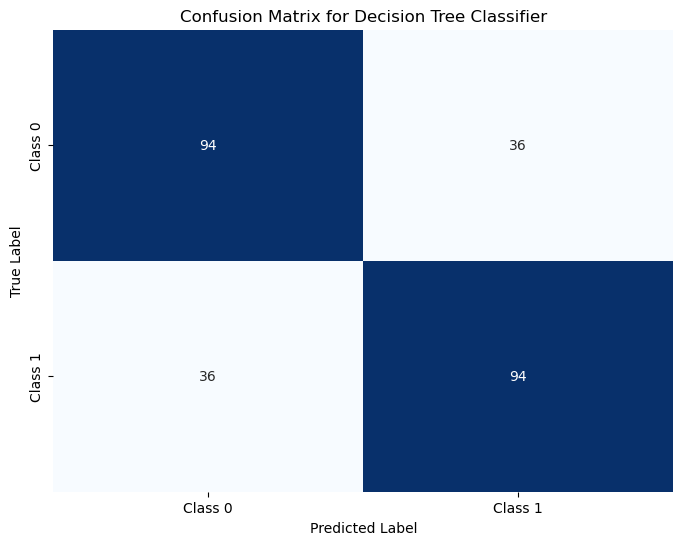

In [146]:
#Applying SVM with Information Gain results

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#Extracting the top 3 features from the balanced training and testing datasets
X_bal_train_svm = X_bal_train[['Glucose', 'Age', 'BMI']]
X_bal_test_svm = X_bal_test[['Glucose', 'Age', 'BMI']]

#Initializing and training the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_bal_train_svm, y_bal_train)

#Predicting the labels for the test set
y_pred_svm = svm_classifier.predict(X_bal_test_svm)

#Calculating accuracy
accuracy_svm = accuracy_score(y_bal_test, y_pred_svm)
print("Accuracy of SVM classifier:", accuracy_svm)

#Computing confusion matrix
conf_matrix_svm = confusion_matrix(y_bal_test, y_pred_svm)
print("Confusion matrix of SVM classifier:\n", conf_matrix_svm)

#Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()



Accuracy of Voting Classifier: 0.7423076923076923
Confusion matrix of Voting Classifier:
 [[98 32]
 [35 95]]


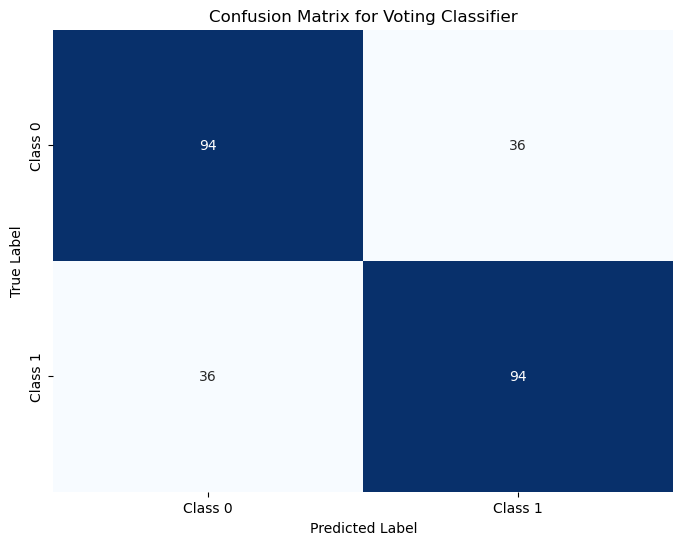

In [147]:
#Using voting classifier ensemble method by combining results of above 5 classifiers

from sklearn.ensemble import VotingClassifier
import numpy as np

#Initialize the Voting Classifier with the above trained classifiers
voting_classifier = VotingClassifier(estimators=[
    ('naive_bayes', nb_classifier),
    ('logistic_regression', lr_classifier),
    ('random_forest', rf_classifier),
    ('decision_tree', dt_classifier),
    ('svm', svm_classifier)
], voting='hard') #We are using hard voting method

#Creating test and train feature matrices combining all the predictions from the above 5 used classifiers
X_train_predictions = np.column_stack((X_bal_train_nb, X_bal_train_lr, X_bal_train_rf, X_bal_train_dt,
                                       X_bal_train_svm))
X_test_predictions = np.column_stack((X_bal_test_nb, X_bal_test_lr, X_bal_test_rf, X_bal_test_dt,
                                       X_bal_test_svm))

#Initializing and fitting the voting classifier
voting_classifier.fit(X_train_predictions, y_bal_train)

#Predicting the labels for the test set
y_pred_voting = voting_classifier.predict(X_test_predictions)

#Calculating the accuracy
accuracy_voting = accuracy_score(y_bal_test, y_pred_voting)
print("Accuracy of Voting Classifier:", accuracy_voting)

#Computing confusion matrix
conf_matrix_voting = confusion_matrix(y_bal_test, y_pred_voting)
print("Confusion matrix of Voting Classifier:\n", conf_matrix_voting)

#Plot the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()
